In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Write Script that Pulls csv data from medicare site and saves down to separate folder
def pull_all_2017_datasets(base_url):
    for month_num in list(range(1,13)):
        file_name = "ful2017{}.csv".format(str(month_num))
        pull = pd.read_csv(base_url+file_name)
        pull.to_csv('/Users/jim_jack/Documents/Mod_3_Project/Mod_3_Project/raw_datasets/'+file_name)

In [3]:
# Files Saved; commenting out run file
# pull_all_2017_datasets('http://www.nber.org/data/federal-upper-limits/2017/')

In [4]:
# Explore initial dataset (June 2017)
df = pd.read_csv("/Users/jim_jack/Documents/Mod_3_Project/Mod_3_Project/raw_datasets/ful20176.csv",index_col="Unnamed: 0")

In [5]:
# confirmed no obvious NaN data
df.isna().any()

productgroup                        False
ingredient                          False
strength                            False
dosage                              False
route                               False
mdrunittype                         False
weightedaverageamps                 False
acaful                              False
packagesize                         False
ndc                                 False
arated                              False
multipliergreaterthan175percento    False
year                                False
month                               False
dtype: bool

In [6]:
df.head()

,productgroup,ingredient,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,arated,multipliergreaterthan175percento,year,month
0,7975,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.23467,30.0,2323030,Yes,Y,2017,6
1,4792,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.95278,30.0,2323130,Yes,Y,2017,6
2,4794,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.12900,30.0,2323230,Yes,Y,2017,6
3,4793,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.74267,30.0,2323330,Yes,Y,2017,6
4,4795,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.19290,30.0,2323430,Yes,Y,2017,6


In [7]:
# function takes a df column and returns a list of unique delimited (/ and ;) values; Lots going on here
def create_unique_ingr_list(df_column):
    local_ingr_list = []
#     Loop through single df column series and delimit values by backslash and semi-colon; creates list_of_lists
    for ingr in df_column:
        local_ingr_list.append(re.split('/|; ',ingr))
#     This line flattens the list of lists, strips away trailing and leading spaces, sets, and sorts alphabetically the drug list
    return sorted(list(set([item.strip() for sublist in local_ingr_list for item in sublist])))

In [8]:
HCL_updated_ingredient = list(map(lambda ingr: ingr.replace('HYDROCHLORIDE','HCL'),list(df.ingredient)))
HCL_updated_ingredient

['OLANZAPINE/FLUOXETINE HCL                                                                                                                                                                     ',
 'OLANZAPINE/FLUOXETINE HCL                                                                                                                                                                     ',
 'OLANZAPINE/FLUOXETINE HCL                                                                                                                                                                     ',
 'OLANZAPINE/FLUOXETINE HCL                                                                                                                                                                     ',
 'OLANZAPINE/FLUOXETINE HCL                                                                                                                                                                     ',
 'DULOXETINE HCL         

In [9]:
# KEEP ME; UPDATES INGREDIENT LIST; UNCOMMENT WHEN KERNEL IS RERUN; THEN RECOMMENT; OTHERWISE WILL CAUSE DUPS


df['ingredient_normalized'] = HCL_updated_ingredient
df.drop('ingredient',axis=1,inplace=True)

In [10]:
unique_list_of_ingredients = create_unique_ingr_list(HCL_updated_ingredient)
len(unique_list_of_ingredients)

440

In [11]:
add_drugs = pd.DataFrame(columns=unique_list_of_ingredients)

In [12]:
df2 = df.join(add_drugs)

In [13]:
df2.fillna(0,inplace=True)
df2.head()

,productgroup,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,arated,...,VENLAFAXINE HCL,VERAPAMIL HCL,VORICONAZOLE,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE
0,7975,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.23467,30.0,2323030,Yes,...,0,0,0,0,0,0,0,0,0,0
1,4792,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.95278,30.0,2323130,Yes,...,0,0,0,0,0,0,0,0,0,0
2,4794,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.12900,30.0,2323230,Yes,...,0,0,0,0,0,0,0,0,0,0
3,4793,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.74267,30.0,2323330,Yes,...,0,0,0,0,0,0,0,0,0,0
4,4795,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.19290,30.0,2323430,Yes,...,0,0,0,0,0,0,0,0,0,0


In [14]:
sample_update = df2.loc[0:50,['ingredient_normalized','OLANZAPINE','DULOXETINE HCL']]

In [15]:
# proof of filler concept; need to apply across columns
sample_update.OLANZAPINE[sample_update.ingredient_normalized.str.contains('OLANZAPINE',regex=False)] = 1
sample_update

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ingredient_normalized,OLANZAPINE,DULOXETINE HCL
0,OLANZAPINE/FLUOXETINE HCL ...,1,0
1,OLANZAPINE/FLUOXETINE HCL ...,1,0
2,OLANZAPINE/FLUOXETINE HCL ...,1,0
3,OLANZAPINE/FLUOXETINE HCL ...,1,0
4,OLANZAPINE/FLUOXETINE HCL ...,1,0
5,DULOXETINE HCL ...,0,0
6,DULOXETINE HCL ...,0,0
7,DULOXETINE HCL ...,0,0
8,DULOXETINE HCL ...,0,0
9,DULOXETINE HCL ...,0,0


In [16]:
sample_update_2 = df2.loc[0:50,['ingredient_normalized','OLANZAPINE','DULOXETINE HCL']]

In [17]:
# Proof of concept for updating all columns
for ingr in sample_update_2.columns[1:]:
    sample_update_2[ingr][sample_update.ingredient_normalized.str.contains(ingr,regex=False)] = 1

sample_update_2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ingredient_normalized,OLANZAPINE,DULOXETINE HCL
0,OLANZAPINE/FLUOXETINE HCL ...,1,0
1,OLANZAPINE/FLUOXETINE HCL ...,1,0
2,OLANZAPINE/FLUOXETINE HCL ...,1,0
3,OLANZAPINE/FLUOXETINE HCL ...,1,0
4,OLANZAPINE/FLUOXETINE HCL ...,1,0
5,DULOXETINE HCL ...,0,1
6,DULOXETINE HCL ...,0,1
7,DULOXETINE HCL ...,0,1
8,DULOXETINE HCL ...,0,1
9,DULOXETINE HCL ...,0,1


In [18]:
# fuctionalization of the above
def fill_ingredient_dummies(df_):
    for ingr in df_.columns[14:]:
        df_[ingr][df_.ingredient_normalized.str.contains(ingr,regex=False)] = 1

In [19]:
df3 = df2

In [20]:
df2.head()

,productgroup,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,arated,...,VENLAFAXINE HCL,VERAPAMIL HCL,VORICONAZOLE,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE
0,7975,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.23467,30.0,2323030,Yes,...,0,0,0,0,0,0,0,0,0,0
1,4792,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.95278,30.0,2323130,Yes,...,0,0,0,0,0,0,0,0,0,0
2,4794,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.12900,30.0,2323230,Yes,...,0,0,0,0,0,0,0,0,0,0
3,4793,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.74267,30.0,2323330,Yes,...,0,0,0,0,0,0,0,0,0,0
4,4795,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.19290,30.0,2323430,Yes,...,0,0,0,0,0,0,0,0,0,0


In [21]:
fill_ingredient_dummies(df3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
# sample test
df3_sample = df3.iloc[:50,13:]
df3_sample["SUM"] = df3_sample.iloc[:,1:].sum(axis=1)
df3_sample['Multi-Ingredient ?'] = 0
df3_sample.loc[df3_sample['SUM'] > 1, 'Multi-Ingredient ?'] = 1
df3_sample

,ingredient_normalized,ABACAVIR SULFATE,ACAMPROSATE CALCIUM,ACARBOSE,ACETAMIN,ACETAMINOPHEN,ACETAZOLAMIDE,ACITRETIN,ACYCLOVIR,ADAPALENE,...,VORICONAZOLE,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,SUM,Multi-Ingredient ?
0,OLANZAPINE/FLUOXETINE HCL ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
1,OLANZAPINE/FLUOXETINE HCL ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
2,OLANZAPINE/FLUOXETINE HCL ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
3,OLANZAPINE/FLUOXETINE HCL ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
4,OLANZAPINE/FLUOXETINE HCL ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
5,DULOXETINE HCL ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,DULOXETINE HCL ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,DULOXETINE HCL ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,DULOXETINE HCL ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,DULOXETINE HCL ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
# sub sample test
df3_sub_sample = df3_sample.loc[:,['ingredient_normalized','OLANZAPINE','FLUOXETINE HCL']]
df3_sub_sample["SUM"] = df3_sub_sample.iloc[:,1:].sum(axis=1)
df3_sub_sample['Multi-Ingredient ?'] = 0
df3_sub_sample.loc[df3_sub_sample['SUM'] > 1, 'Multi-Ingredient ?'] = 1

In [24]:
df4 = df3

In [25]:
# Adding in multi-ingredient column
df4["SUM"] = df4.iloc[:,14:].sum(axis=1)
df4['Multi-Ingredient ?'] = 0
df4.loc[df4['SUM'] > 1, 'Multi-Ingredient ?'] = 1
df4

,productgroup,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,arated,...,VORICONAZOLE,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,SUM,Multi-Ingredient ?
0,7975,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.234670,30.0,2323030,Yes,...,0,0,0,0,0,0,0,0,2,1
1,4792,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.952780,30.0,2323130,Yes,...,0,0,0,0,0,0,0,0,2,1
2,4794,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.129000,30.0,2323230,Yes,...,0,0,0,0,0,0,0,0,2,1
3,4793,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.742670,30.0,2323330,Yes,...,0,0,0,0,0,0,0,0,2,1
4,4795,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.192900,30.0,2323430,Yes,...,0,0,0,0,0,0,0,0,2,1
5,5028,20 MG ...,CAPSULE DR,ORAL,CAP,0.239553,0.419218,60.0,2323560,Yes,...,0,0,0,0,0,0,0,0,1,0
6,5029,30 MG ...,CAPSULE DR,ORAL,CAP,0.242719,0.424758,30.0,2324030,Yes,...,0,0,0,0,0,0,0,0,1,0
7,5029,30 MG ...,CAPSULE DR,ORAL,CAP,0.242719,0.424758,90.0,2324090,Yes,...,0,0,0,0,0,0,0,0,1,0
8,5030,60 MG ...,CAPSULE DR,ORAL,CAP,0.410402,0.718204,1000.0,2327004,Yes,...,0,0,0,0,0,0,0,0,1,0
9,5030,60 MG ...,CAPSULE DR,ORAL,CAP,0.410402,0.718204,30.0,2327030,Yes,...,0,0,0,0,0,0,0,0,1,0


In [26]:
df4_strength = df4.strength
df4_strength_list = list(map(lambda x: x.replace(" ",""),df4_strength))
len(set(df4_strength_list))

317

In [27]:
df4_updated_ingredient = list(map(lambda stren: stren.replace(' ',''),list(df4.strength)))
df4['strength_normalized'] = df4_updated_ingredient
df4.drop('strength',axis=1,inplace=True)

In [28]:
values = df4.strength_normalized.value_counts()
df4_values = values.rename_axis('type').reset_index(name='counts')

Text(0.5, 1.0, 'strength value counts')

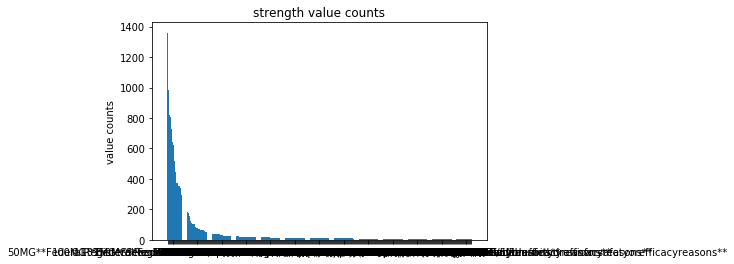

In [29]:
# Might need to do a log transformation on this data; if i consider it a 
plt.bar(df4_values['type'],df4_values['counts'])
plt.ylabel('value counts')
plt.title('strength value counts')

In [30]:
df4.multipliergreaterthan175percento[df4.multipliergreaterthan175percento == 'N'] = 0
df4.multipliergreaterthan175percento[df4.multipliergreaterthan175percento == 'Y'] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'class value counts')

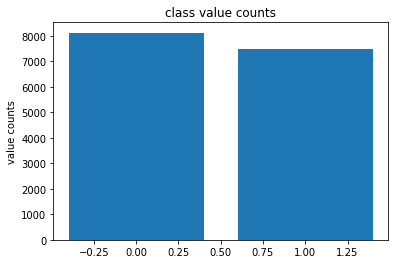

In [31]:
classification = df4.multipliergreaterthan175percento.value_counts()
df4_class = classification.rename_axis('class').reset_index(name='counts')
plt.bar(df4_class['class'],df4_class['counts'])
plt.ylabel('value counts')
plt.title('class value counts')

In [34]:
df4.head()

,productgroup,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,arated,multipliergreaterthan175percento,...,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,SUM,Multi-Ingredient ?,strength_normalized
0,7975,CAPSULE,ORAL,CAP,2.276870,7.23467,30.0,2323030,Yes,1,...,0,0,0,0,0,0,0,2,1,3MG-25MG
1,4792,CAPSULE,ORAL,CAP,2.400121,7.95278,30.0,2323130,Yes,1,...,0,0,0,0,0,0,0,2,1,6MG-25MG
2,4794,CAPSULE,ORAL,CAP,4.713770,13.12900,30.0,2323230,Yes,1,...,0,0,0,0,0,0,0,2,1,12MG-25MG
3,4793,CAPSULE,ORAL,CAP,2.758260,9.74267,30.0,2323330,Yes,1,...,0,0,0,0,0,0,0,2,1,6MG-50MG
4,4795,CAPSULE,ORAL,CAP,3.614041,14.19290,30.0,2323430,Yes,1,...,0,0,0,0,0,0,0,2,1,12MG-50MG


In [71]:
all_yes = []
all_no = []
others = []
for x in df4['ingredient_normalized'].unique().tolist():
    if ((df4[df4.ingredient_normalized == x].multipliergreaterthan175percento).mean()== 1):
        all_yes.append(x)
        return (df4[df4.ingredient_normalized == x].multipliergreaterthan175percento).mean()
    if  ((df4[df4.ingredient_normalized == x].multipliergreaterthan175percento).mean()== 0):
        all_no.append(x)
    else:
        others.append(x)
        
sorted(others)

SyntaxError: 'return' outside function (<ipython-input-71-1cfe0b0eca34>, line 7)

In [65]:
df4.multipliergreaterthan175percento[df4.ingredient_normalized == others[1]]

14       1
15       1
16       1
1254     1
1255     1
1256     1
3692     1
3693     1
3694     1
6721     1
6722     1
6723     1
12156    1
12157    1
12158    1
12750    1
12751    1
12752    1
12758    1
12759    1
12760    1
13926    1
13927    1
14938    1
14939    1
15206    1
15207    1
15208    1
15505    1
15506    1
Name: multipliergreaterthan175percento, dtype: object

In [ ]:
# use onehotencoder tomorrow for categorical variables
# regularization
# ridge, lasso --> (drops completely)
# Google strength normalization 
#     kaggle
#     maybe google scholar?